<a href="https://colab.research.google.com/github/Tapiwanashe6/pca_formative_assignment/blob/main/Template_PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

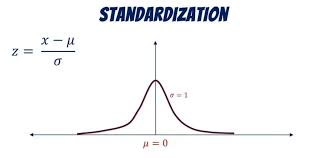


In [ ]:
# Step 1: Load and Standardize the data (NumPy only)
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv("DatasetAfricaMalaria.csv")

# Select numeric columns only for PCA
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].values

# ------------------------------
# Step 1a: Handle missing values
# Replace NaN with column mean
col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])

# ------------------------------
# Step 1b: Remove constant columns (std = 0)
std = np.std(X, axis=0)
non_constant_cols = std != 0
X = X[:, non_constant_cols]
numeric_cols = numeric_cols[non_constant_cols]

# ------------------------------
# Step 1c: Standardize the data (mean=0, std=1)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_data = (X - mean) / std

# Display the first 5 rows
standardized_data[:5]


array([[-1.58113883e+00, -1.21256459e+00, -5.06760222e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
        -1.20335604e+00,  1.84377536e+00, -1.45712868e+00,
        -1.23400095e+00, -1.66809102e+00,  1.23397271e+00,
        -5.61646882e-01,  1.49495110e+00,  1.86242385e+00,
         1.15800583e+00,  1.77365688e+00,  2.08348956e+00,
         1.99788845e+00,  1.60900436e+00, -7.83191277e-01],
       [-1.58113883e+00,  6.16449417e-01,  2.20650663e-01,
        -2.59139328e+00, -4.70762105e-02, -2.59441287e+00,
        -6.55710122e-16,  0.00000000e+00,  5.41893472e-16,
         0.00000000e+00, -1.17007624e-15,  0.00000000e+00,
        -7.98503589e-01,  4.36548583e-01,  7.98470288e-01,
         1.02714839e+00, -1.04968763e+00, -1.49943184e+00,
        -2.03128810e+00, -8.45063064e-02, -6.00246444e-01,
         2.98713596e-01, -8.95720879e-01,  2.65347191e-02],
       [-1.58113883e+00,  1.85097486e+00, -5.06772555e

In [ ]:
# Step 3: Calculate the Covariance Matrix

# Covariance matrix: np.cov with rowvar=False because variables are in columns
cov_matrix = np.cov(standardized_data, rowvar=False)

# Display the covariance matrix
cov_matrix


array([[ 1.00168634e+00, -6.80542806e-02,  3.57947203e-01,
         2.33223297e-01, -1.83047706e-02,  1.75372178e-01,
         3.65843539e-02,  6.59681612e-02,  2.73071409e-02,
         3.84413217e-02,  9.46769860e-02,  2.67796335e-02,
        -8.40379544e-02, -4.97357957e-02,  8.40398632e-02,
        -5.65317141e-02,  1.18565745e-01,  1.10879038e-01,
         1.00777429e-01,  6.83801684e-02,  6.84030302e-02,
         5.87010243e-02, -9.12704426e-19,  5.24219978e-18],
       [-6.80542806e-02,  1.00168634e+00,  2.88995393e-01,
         4.30348950e-03,  2.29939995e-01,  6.06777508e-02,
        -1.75492561e-01, -1.69633937e-01, -3.72772114e-01,
        -2.07579206e-01, -9.71252108e-02, -1.62720237e-01,
         2.45446793e-01,  3.87139217e-01, -2.45450290e-01,
         3.09619690e-01, -3.68912526e-01, -3.13484257e-01,
        -3.99015433e-01, -4.40983873e-01, -3.75800980e-01,
        -4.25948448e-01,  5.88013289e-02, -2.64875225e-01],
       [ 3.57947203e-01,  2.88995393e-01,  1.00168634e

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 4: Perform Eigendecomposition

# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display the eigenvalues and shape of eigenvectors
print("Eigenvalues:", eigenvalues)
print("Shape of eigenvectors matrix:", eigenvectors.shape)

# Optionally display the first few eigenvectors
print("First 3 eigenvectors:\n", eigenvectors[:, :3])

Eigenvalues: [7.47866447e+00 2.23494453e+00 2.04877421e+00 1.77596923e+00
 1.46507889e+00 1.28042481e+00 1.17147431e+00 1.01911332e+00
 8.90113383e-01 7.57789569e-01 6.66562869e-01 6.49614679e-01
 6.01745519e-01 4.36829542e-01 3.78377003e-01 3.19286817e-01
 3.12818609e-02 6.26864578e-03 1.05297883e-08 9.60916442e-02
 1.26540049e-01 2.12741241e-01 2.20070925e-01 1.72714643e-01]
Shape of eigenvectors matrix: (24, 24)
First 3 eigenvectors:
 [[ 0.03699773 -0.03396604 -0.08152031]
 [-0.18910274 -0.16826851 -0.209475  ]
 [-0.10647365  0.03164139 -0.19160607]
 [-0.01171399 -0.02547894 -0.12163211]
 [-0.05913798 -0.1202187  -0.19281576]
 [-0.00128515 -0.11569347 -0.13472151]
 [ 0.22785864  0.04143435 -0.35548409]
 [ 0.17297306 -0.07388339 -0.12831655]
 [ 0.20251061  0.07544259  0.07658302]
 [ 0.19697117  0.22109233 -0.4507928 ]
 [ 0.11921716 -0.17292383  0.04453761]
 [ 0.17385928  0.22159229 -0.48466946]
 [-0.23548792  0.41070639 -0.0366844 ]
 [-0.23816671  0.17904064 -0.22050586]
 [ 0.2354897

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 5: Sort Principal Components

# Get indices of eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues
sorted_eigenvalues = eigenvalues[sorted_indices]

# Sort eigenvectors to match the sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the sorted eigenvectors
sorted_eigenvectors

array([[ 3.69977278e-02, -3.39660398e-02, -8.15203111e-02,
        -4.38452126e-01, -2.31139912e-01, -2.70373410e-01,
         1.76222096e-01,  3.32017402e-01,  2.68976109e-01,
         2.30068338e-01, -3.03743364e-01, -7.23508005e-02,
        -2.62569133e-01,  4.76759322e-01,  7.54940914e-03,
        -8.39911330e-02, -1.25032098e-02,  4.78181903e-02,
         2.31131542e-04,  4.45584131e-02,  1.27976816e-02,
         6.99915103e-03,  2.34107996e-03, -5.82182391e-06],
       [-1.89102736e-01, -1.68268507e-01, -2.09474999e-01,
        -5.99710339e-02, -7.42691199e-03,  2.31829587e-01,
         3.39231352e-02, -2.42260580e-01,  3.28902108e-01,
         6.30593570e-02,  3.73889939e-01,  4.70175876e-01,
         1.87388632e-01,  3.63006768e-01, -8.04092407e-02,
        -1.29248205e-01, -2.47799063e-01,  1.39517956e-01,
        -1.15663604e-01, -1.26922843e-01, -2.32224089e-02,
        -4.34863093e-03,  2.86687807e-02, -2.04941360e-06],
       [-1.06473653e-01,  3.16413854e-02, -1.91606072e

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components

# Get indices of eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues
sorted_eigenvalues = eigenvalues[sorted_indices]

# Sort eigenvectors to match the sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the sorted eigenvectors
sorted_eigenvectors


array([[ 3.69977278e-02, -3.39660398e-02, -8.15203111e-02,
        -4.38452126e-01, -2.31139912e-01, -2.70373410e-01,
         1.76222096e-01,  3.32017402e-01,  2.68976109e-01,
         2.30068338e-01, -3.03743364e-01, -7.23508005e-02,
        -2.62569133e-01,  4.76759322e-01,  7.54940914e-03,
        -8.39911330e-02, -1.25032098e-02,  4.78181903e-02,
         2.31131542e-04,  4.45584131e-02,  1.27976816e-02,
         6.99915103e-03,  2.34107996e-03, -5.82182391e-06],
       [-1.89102736e-01, -1.68268507e-01, -2.09474999e-01,
        -5.99710339e-02, -7.42691199e-03,  2.31829587e-01,
         3.39231352e-02, -2.42260580e-01,  3.28902108e-01,
         6.30593570e-02,  3.73889939e-01,  4.70175876e-01,
         1.87388632e-01,  3.63006768e-01, -8.04092407e-02,
        -1.29248205e-01, -2.47799063e-01,  1.39517956e-01,
        -1.15663604e-01, -1.26922843e-01, -2.32224089e-02,
        -4.34863093e-03,  2.86687807e-02, -2.04941360e-06],
       [-1.06473653e-01,  3.16413854e-02, -1.91606072e

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components

# Decide number of principal components to keep (e.g., enough to explain ~90% variance)
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find number of components to retain ~90% variance
num_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components to retain ~90% variance: {num_components}")

# Select the top 'num_components' eigenvectors
top_eigenvectors = sorted_eigenvectors[:, :num_components]

# Project standardized data onto top principal components
reduced_data = standardized_data.dot(top_eigenvectors)

# Display the first 5 rows of projected data
reduced_data[:5]


Number of components to retain ~90% variance: 13


array([[ 4.22525811, -1.9622283 ,  2.24984972, -0.38749381,  0.43053691,
         2.38324007,  0.39397177, -0.16940471, -1.66842721,  0.24253881,
         0.27861449, -0.60831191,  0.60776882],
       [-1.54423135, -0.47672866,  0.32876327,  3.46372508,  0.72387603,
        -0.44455782,  2.69229049, -1.32807757,  0.43673194,  0.52181183,
         1.07902057, -0.19665126, -0.26839598],
       [-1.78083426, -1.08796635, -0.7715882 ,  1.19742021,  0.2377475 ,
         0.88271836, -0.77992688, -0.68517593,  0.38392486, -0.86225423,
         0.28610567,  1.17650849,  0.48934755],
       [ 2.86128444,  0.17608171,  2.14168675,  0.82906946, -0.04660428,
        -1.37053427, -0.59448648, -1.39348563, -0.47428867, -1.46431395,
         1.67574811, -1.08959029, -0.23667376],
       [-2.52840042, -0.48298968, -1.22026901,  1.29716707, -0.38609518,
         1.56553552, -0.51839394, -0.68485408, -0.1398122 , -0.95807794,
         0.93462071,  0.02599092,  0.5825197 ]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (594, 13)


array([[ 4.22525811, -1.9622283 ,  2.24984972, -0.38749381,  0.43053691,
         2.38324007,  0.39397177, -0.16940471, -1.66842721,  0.24253881,
         0.27861449, -0.60831191,  0.60776882],
       [-1.54423135, -0.47672866,  0.32876327,  3.46372508,  0.72387603,
        -0.44455782,  2.69229049, -1.32807757,  0.43673194,  0.52181183,
         1.07902057, -0.19665126, -0.26839598],
       [-1.78083426, -1.08796635, -0.7715882 ,  1.19742021,  0.2377475 ,
         0.88271836, -0.77992688, -0.68517593,  0.38392486, -0.86225423,
         0.28610567,  1.17650849,  0.48934755],
       [ 2.86128444,  0.17608171,  2.14168675,  0.82906946, -0.04660428,
        -1.37053427, -0.59448648, -1.39348563, -0.47428867, -1.46431395,
         1.67574811, -1.08959029, -0.23667376],
       [-2.52840042, -0.48298968, -1.22026901,  1.29716707, -0.38609518,
         1.56553552, -0.51839394, -0.68485408, -0.1398122 , -0.95807794,
         0.93462071,  0.02599092,  0.5825197 ]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

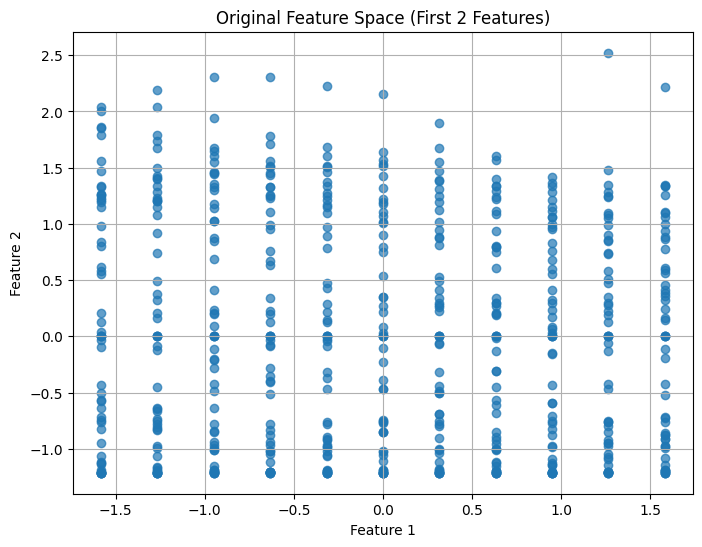

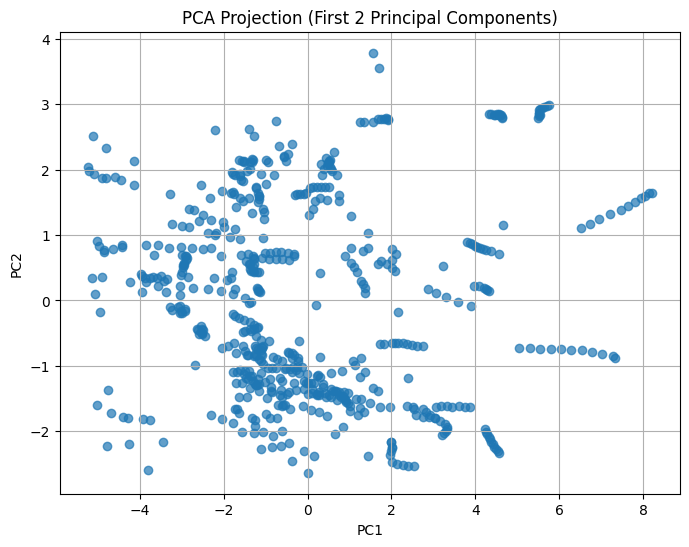

In [ ]:
import matplotlib.pyplot as plt

# ==============================
# Step 8: Visualize Before and After PCA
# ==============================

# 1️⃣ Plot original data (first two numeric features)
plt.figure(figsize=(8,6))
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Feature Space (First 2 Features)')
plt.grid(True)
plt.show()

# 2️⃣ Plot reduced data after PCA (first two principal components)
# If reduced_data has only 1 component, we plot vs index
if reduced_data.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Projection (First 2 Principal Components)')
    plt.grid(True)
    plt.show()
else:
    plt.figure(figsize=(8,6))
    plt.plot(reduced_data[:, 0], marker='o', linestyle='', alpha=0.7)
    plt.xlabel('Sample Index')
    plt.ylabel('PC1')
    plt.title('PCA Projection (Single Principal Component)')
    plt.grid(True)
    plt.show()
